In [ ]:
#config de lib y estilos de las graficas, y cargar el dataset
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

df = pd.read_csv("data.csv")

In [ ]:
#imprime las primeras 5

print(df.head())

In [ ]:
#muesra los ultimos 5

print(df.tail())

In [ ]:
#informacion general para entender el dataset

print(f"Numero de filas {df.shape[0]}" ) 
print(f"Numero de columnas {df.shape[1]}" )
print(f"Columnas: {df.columns.tolist()}" )

In [ ]:
#config los nombres de las columnas (para manejarlas mas facil)

df.columns = [
    "mt",
    "edad",
    "perfil",
    "ciudad",
    "cant_vehiculos",
    "freq_taller",
    "gasto_mensual",
    "sat_diagnostico",
    "cobros_innecesarios",
    "dfc_taller",
    "registro",
    "olv_mantenimiento",
    "accion_falla",
    "util_app",
    "dispuesto_chat",
    "confianza_ia",
    "caracteristicas_valoradas",
    "pref_citas",
    "pago_dispuesto",
    "probabilidad_uso",
    "otras_funcionalidades",
    "email",
]

df.columns

In [94]:
df_clean = df.drop(columns=['mt', 'email', 'otras_funcionalidades'])

print(f"Ds : {df.shape[1]} ")
print(f"Ds clean : {df_clean.shape[1]} ")

print(df_clean.columns)

Ds : 22 
Ds clean : 19 
Index(['edad', 'perfil', 'ciudad', 'cant_vehiculos', 'freq_taller',
       'gasto_mensual', 'sat_diagnostico', 'cobros_innecesarios', 'dfc_taller',
       'registro', 'olv_mantenimiento', 'accion_falla', 'util_app',
       'dispuesto_chat', 'confianza_ia', 'caracteristicas_valoradas',
       'pref_citas', 'pago_dispuesto', 'probabilidad_uso'],
      dtype='object')


In [ ]:

nulos = df_clean.isnull().sum()#valores nulos
print(nulos)

print("\n")
p_nulos= (df_clean.isnull().sum() / len(df_clean) * 100) #% nulos
print(p_nulos)


In [ ]:

# cantidad respuestas de cada pregunta

for col in df_clean.columns:
    print(df_clean[col].value_counts())
    print("\n")


In [ ]:
# Resumen estadístico
df_clean.describe(include='all')

In [ ]:
# Revisar valores unicos por categoria

for col in df_clean.columns:
    print(df_clean[col].unique())
    print(f"categorías: {df_clean[col].nunique()}")
    print("\n")

=== VALORES ÚNICOS POR VARIABLE ===

--- EDAD ---
['18-25 años' '36-45 años' '26-35 años' 'Mas de 55 años']
Total de categorías: 4


--- PERFIL ---
['Propietario de vehiculo']
Total de categorías: 1


--- CIUDAD ---
['Ciudad mediana (100,000-500,000 habitantes)'
 'Ciudad grande (más de 500,000 habitantes)'
 'Ciudad pequeña (menos de 100,000 habitantes)']
Total de categorías: 3


--- CANT_VEHICULOS ---
['1 vehículo' '2 vehículos' 'Más de 3 vehículos']
Total de categorías: 3


--- FREQ_TALLER ---
['Mensualmente' 'Solo cuando presenta fallas' 'Cada 6 meses'
 'Cada 2-3 meses' 'Una vez al año o menos']
Total de categorías: 5


--- GASTO_MENSUAL ---
['$500-$1,000 MXN' '$1,001-$2,000 MXN' '$2,001-$3,000 MXN'
 'Mas de $3,000 MXN' 'Menos de $500 MXN']
Total de categorías: 5


--- SAT_DIAGNOSTICO ---
['Satisfecho' 'Neutral' 'Muy satisfecho' 'Insatisfecho' 'Muy insatisfecho']
Total de categorías: 5


--- COBROS_INNECESARIOS ---
['Rara vez' 'Frecuentemente' 'Algunas veces' 'Siempre' 'Nunca']
Total

Porcentajes:
edad
18-25 años        70.731707
26-35 años        19.512195
36-45 años         7.317073
Mas de 55 años     2.439024
Name: proportion, dtype: float64


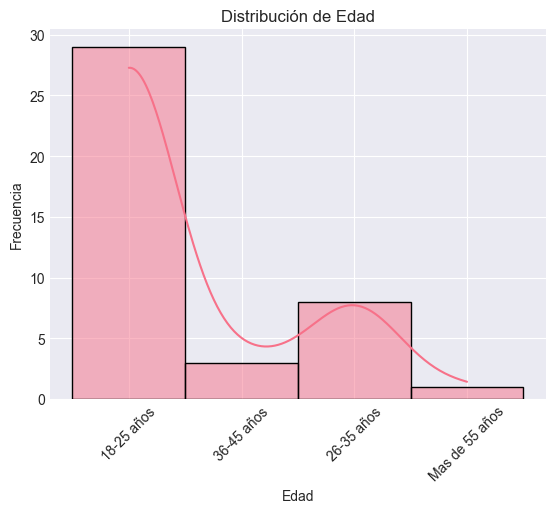

In [78]:
# Analisis edad
print("Porcentajes:")
print(df_clean['edad'].value_counts(normalize=True) * 100)


orden_edad = ['18-25 años', '26-35 años', '36-45 años', '46-55 años', 'Más de 55 años']
sns.histplot(data=df_clean, x='edad', kde=True)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")
plt.show()


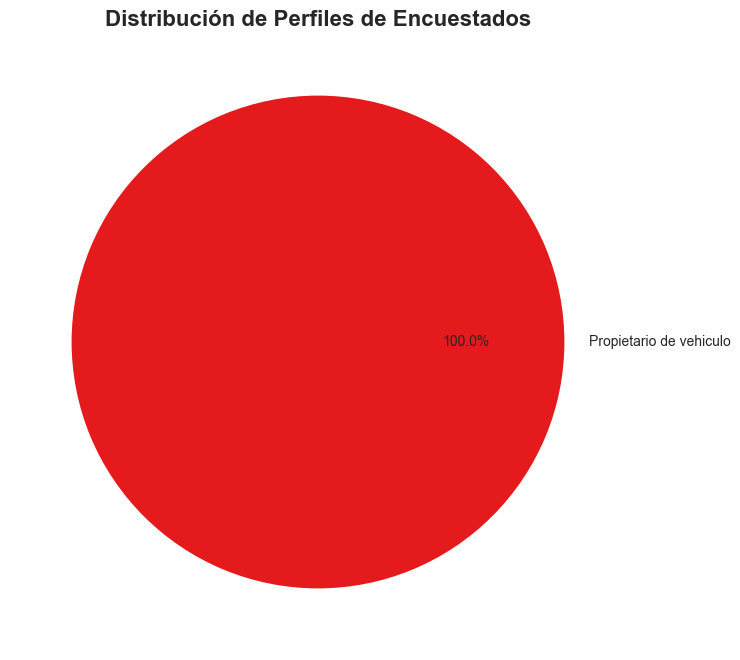

In [ ]:
# Análisis perfil

perfil_counts = df_clean['perfil'].value_counts()
labels = perfil_counts.index

plt.figure(figsize=(8, 8))
plt.pie(perfil_counts, labels=labels, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('Set1', len(labels)))

plt.title('Distribución de Perfiles de Encuestados', fontsize=16, fontweight='bold')
plt.show()

C:\Users\will-\AppData\Local\Temp\ipykernel_20728\4064033549.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


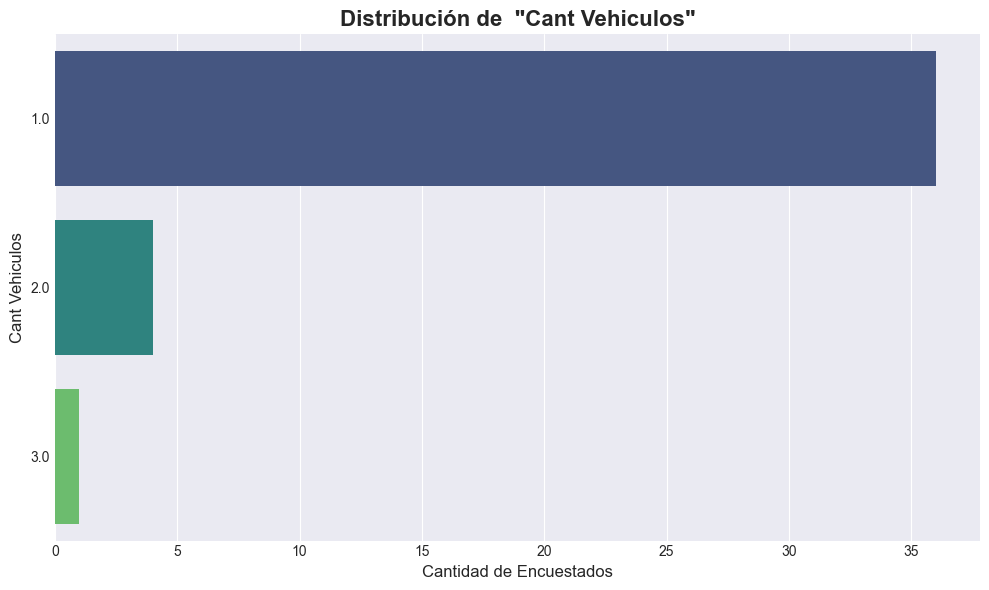

In [104]:
#análisis con grafica de barras

analizar = 'cant_vehiculos'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='viridis'
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()

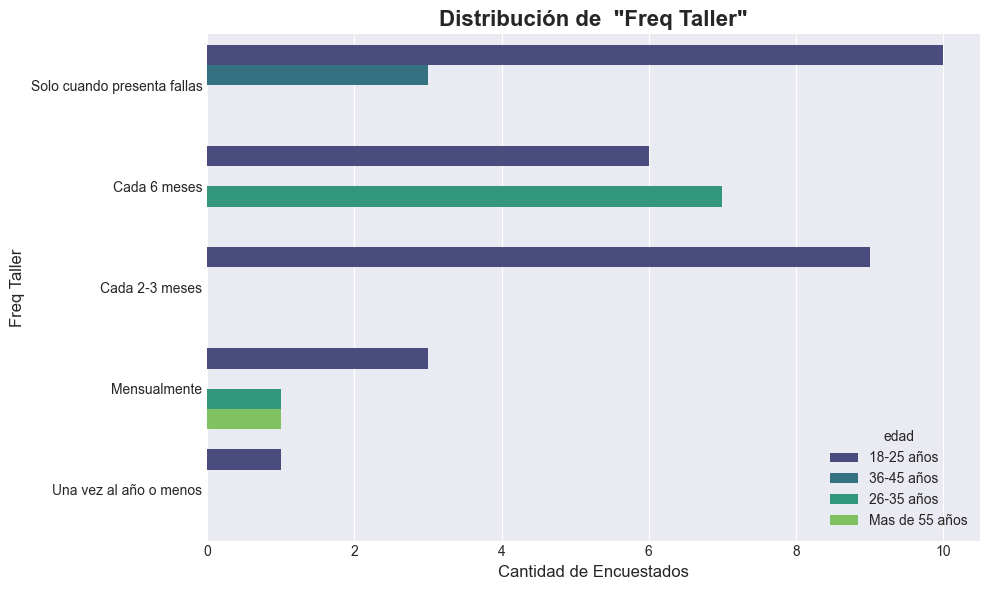

In [ ]:
#análisis con grafica de barras

analizar = 'freq_taller'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='viridis'
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()

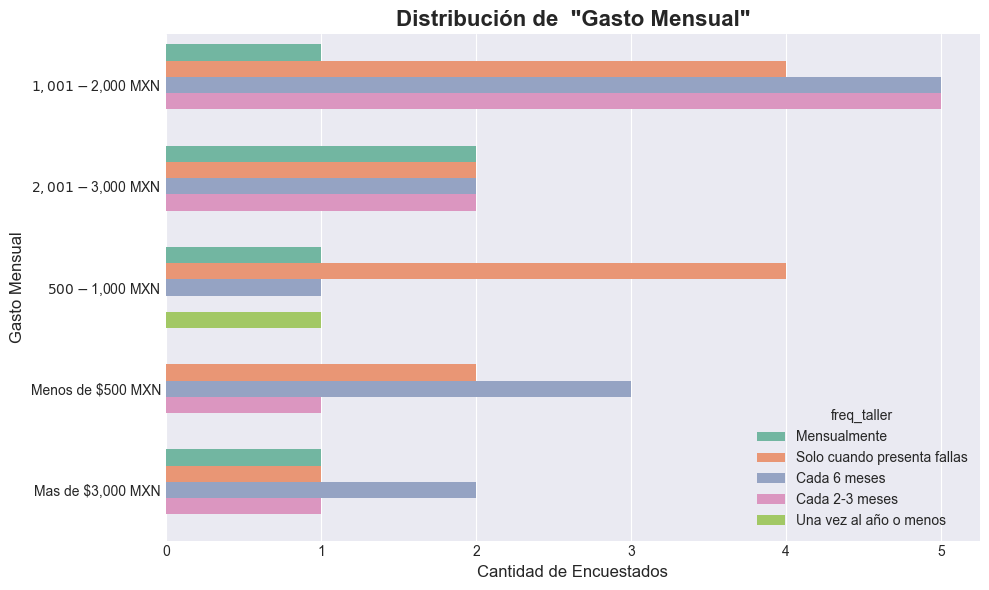

In [122]:
#análisis con grafica de barras

analizar = 'gasto_mensual'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='Set2', hue="freq_taller"
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()

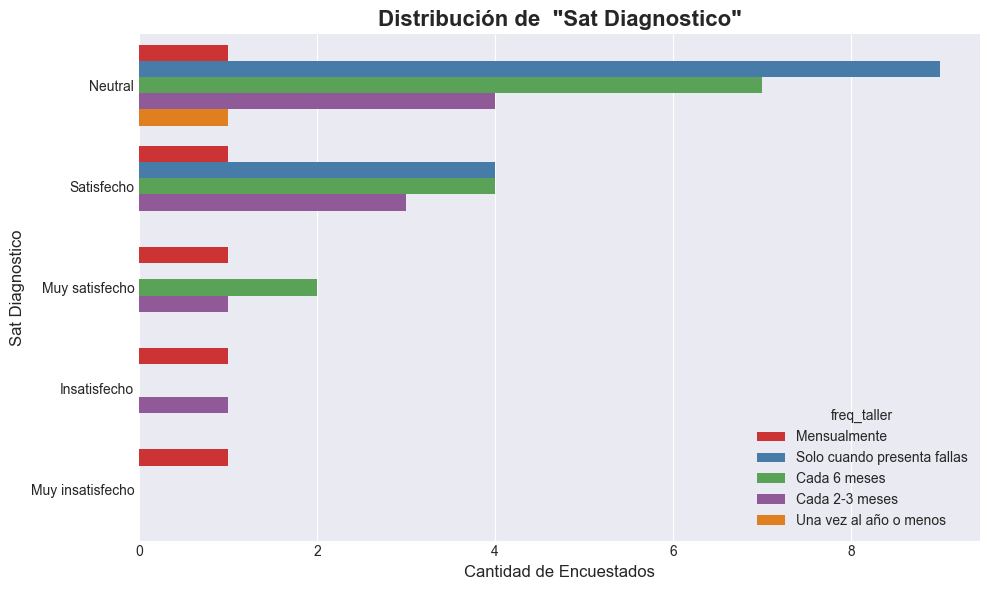

In [125]:
#análisis con grafica de barras

analizar = 'sat_diagnostico'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='Set1', hue="freq_taller"
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()

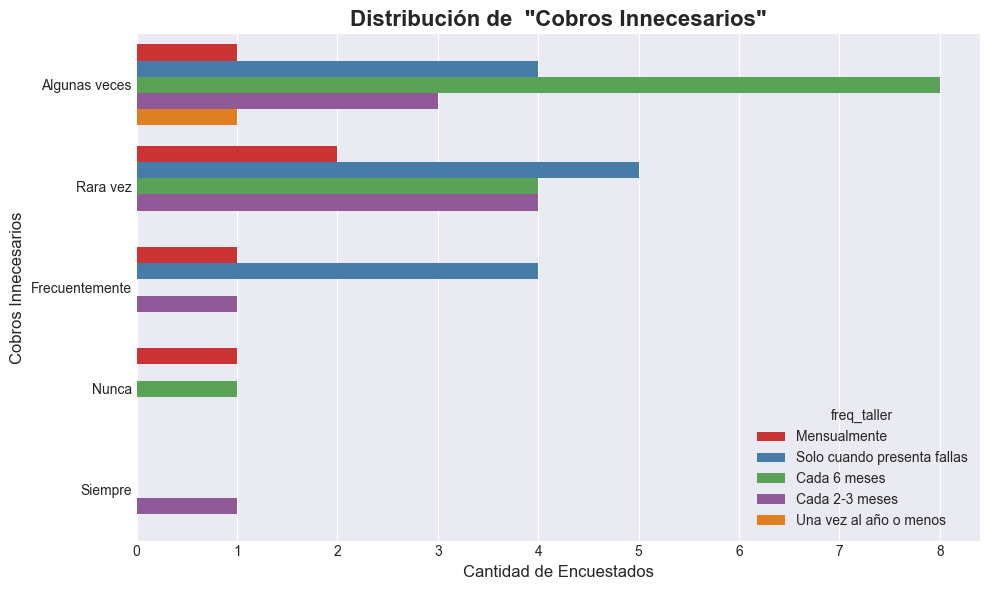

In [127]:
#análisis con grafica de barras

analizar = 'cobros_innecesarios'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='Set1', hue="freq_taller"
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()

cobros_innecesarios
Algunas veces     17
Rara vez          15
Frecuentemente     6
Nunca              2
Siempre            1
Name: count, dtype: int64


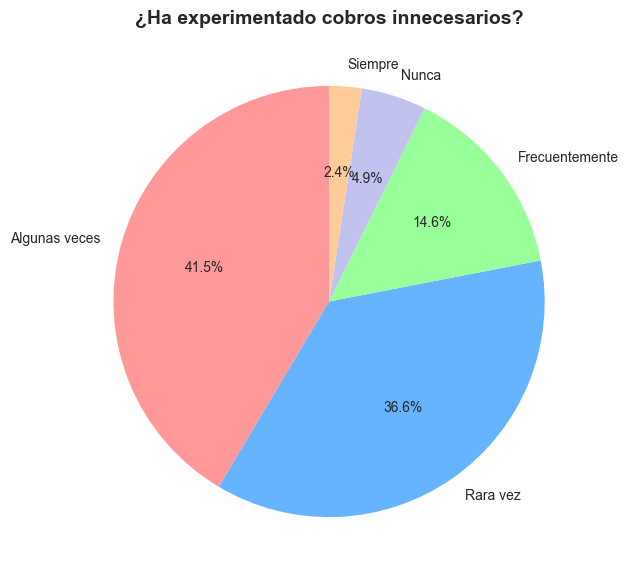

In [136]:
# analisis cobros innecesarios
print(df_clean['cobros_innecesarios'].value_counts())

plt.figure(figsize=(7, 7))
df_clean['cobros_innecesarios'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff', "#99ff99", "#c2c2f0", "#ffcc99"], startangle=90)
plt.title('¿Ha experimentado cobros innecesarios?', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

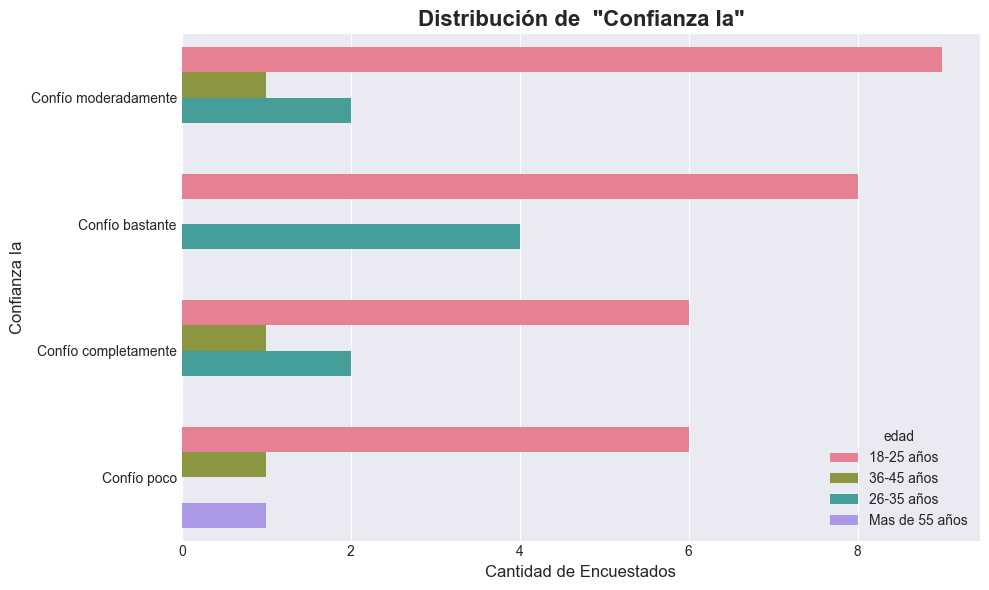

In [145]:
#análisis con grafica de barras

analizar = 'confianza_ia'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='husl', hue="edad"
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()

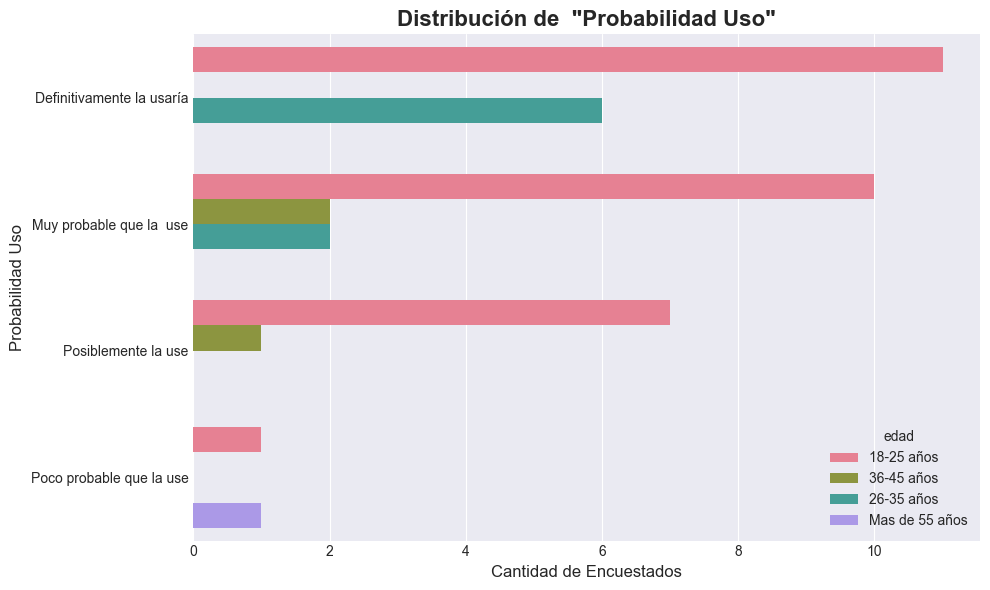

In [146]:
#análisis con grafica de barras

analizar = 'probabilidad_uso'

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_clean,
    y=analizar,
    order=df_clean[analizar].value_counts().index,
    palette='husl', hue="edad"
)

titulo = analizar.replace("_", " ").title()
ax.set_title(f'Distribución de  "{titulo}"', fontsize=16, fontweight='bold')
ax.set_xlabel('Cantidad de Encuestados', fontsize=12)
ax.set_ylabel(titulo, fontsize=12)
plt.tight_layout()
plt.show()